In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.path)
from eigenwell.src import grid, eigen_w, structure, mode_filter
from eigenwell.src.constants import *
import scipy.sparse.linalg as la

print(MU0)
print(EPSILON0)
print(C0)

['/Users/nathanzhao/src/eigenwell/notebooks', '/Users/nathanzhao/src', '/Users/nathanzhao/opt/anaconda3/lib/python38.zip', '/Users/nathanzhao/opt/anaconda3/lib/python3.8', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/nathanzhao/src/ceviche', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/nathanzhao/.ipython']
1.2566370614359173e-06
8.854e-12
299795637.69321626


## Analytic Solution


## 2D simulation of slab waveguide

In [10]:
def domain_with_pml(xrange, yrange, N, Npml):
    # %% Input parameters
    # % xrange: [xmin xmax], range of domain in x-direction without PML
    # % yrange: [ymin ymax], range of domain in y-direction without PML
    # % N: [Nx Ny], numbers of cells in x- and y-directions without PML
    # % Npml: [Nx_pml Ny_pml], numbers of cells in the x- and y-normal PML

#     %% Output parameters
#     % xrange: [xmin xmax], updated range of domain in x-direction including PML thickness
#     % yrange: [ymin ymax], updated range of domain in y-direction including PML thickness
#     % N: updated numbers of cells in the x- and y-directions including cells in PML
#     % dL: [dx dy], cell sizes
#     % Lpml: [Lx_pml Ly_pml], thicknesses of x- and y-normal PML

    L = [np.diff(xrange),np.diff(yrange)];  #% [Lx Ly]
    dL = L/N;  #% [dx dy]

    Lpml = Npml* dL;  #% [Lx_pml, Ly_pml]
    xrange = xrange + np.array([-1, 1]) * Lpml[0];  #% [xmin xmax] is updated
    yrange = yrange + np.array([-1, 1]) * Lpml[1];  #% [ymin ymax] is updated

    N = N + 2*Npml;  #% [Nx Ny] is updated
    
    return xrange, yrange, N, dL, Lpml;

In [11]:
xrange = 0.1*np.array([-1,1])*1e-6;  # x boundaries in L0
yrange = 0.8*np.array([-1,1])*1e-6;  # y boundaries in L0
L = np.array([np.diff(xrange)[0], np.diff(yrange)[0]]);
N = np.array([100, 500]);  #% [Nx Ny]
Npml = np.array([0, 15]);  #% [Nx_pml Ny_pml]
dL = L/N;
print(L)

[2.0e-07 1.6e-06]


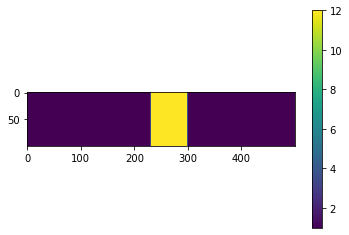

In [12]:
epsilon = np.ones(N);

epsilon[:,15+250-34:15+250+34]= 12;

plt.figure();
plt.imshow(epsilon);
plt.colorbar();


[2.0e-07 1.6e-06]
[2.0e-07 1.6e-06]
(100, 500) [2.0e-09 3.2e-09]


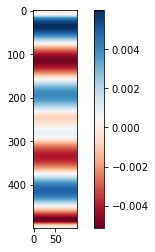

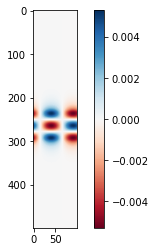

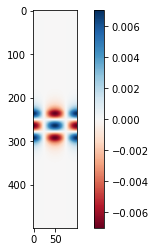

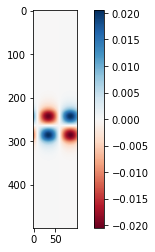

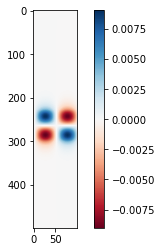

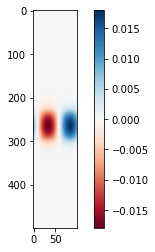

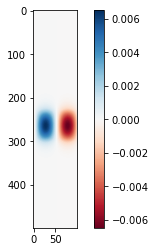

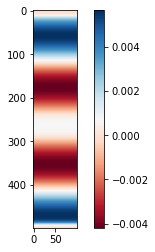

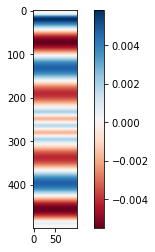

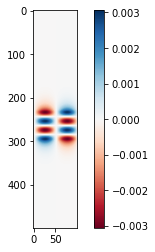

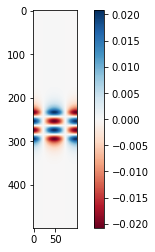

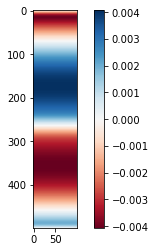

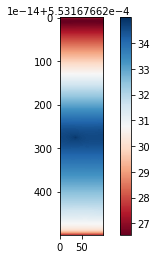

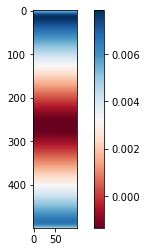

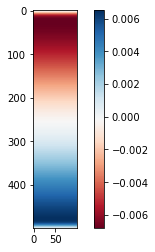

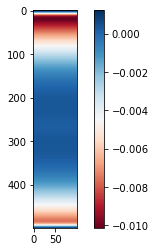

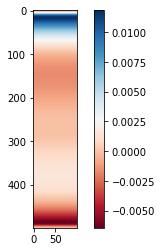

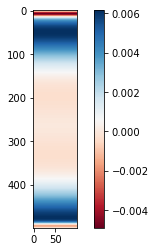

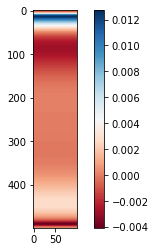

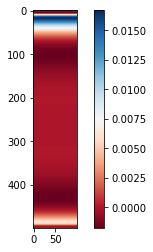

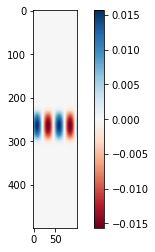

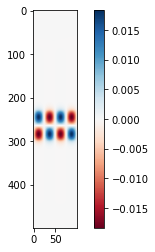

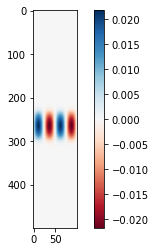

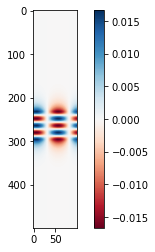

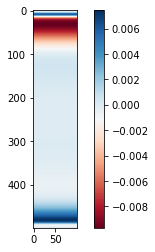

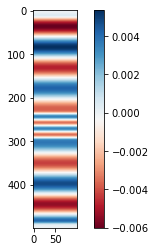

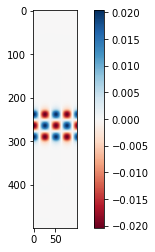

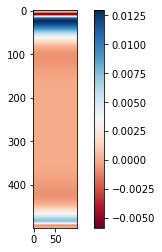

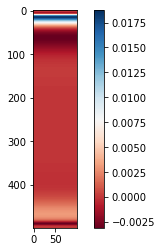

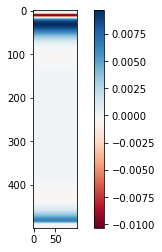

In [13]:
print(L)
st = structure.Structure(epsilon, L)
print(st.L)
print(st.N, st.dL)

omega = 2*np.pi*C0/(0.5e-6)
eigenTE = eigen_w.EigenOmega2D(st, npml = [0,30], omega_guess = omega, polarization= 'TE')# don't expose the finite difference class

A = eigenTE.A;
K =30
eigenvals, eigenmodes = la.eigs(A, k=K, sigma = omega**2)

for i in range(K):
    plt.imshow(np.real(eigenmodes[:,i].reshape(N, order = 'F')).T,cmap = 'RdBu')
    #plt.clim(-0.02, 0.02)
    plt.colorbar();
    plt.show();